In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from operator import attrgetter
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

İstenilen müşteri grubunu belirtin (Tümü/Geleneksel/EDT/Bireysel)>>>>Tümü
    cohort        0       1       2       3       4      5      6      7  \
0  2020-03   2084.0   355.0   324.0   381.0   368.0  349.0  368.0  344.0   
1  2020-04   3385.0   497.0   407.0   359.0   365.0  382.0  385.0    NaN   
2  2020-05   7113.0   827.0   708.0   631.0   704.0  675.0    NaN    NaN   
3  2020-06   9023.0  1259.0  1120.0  1133.0  1057.0    NaN    NaN    NaN   
4  2020-07  11846.0  1314.0  1324.0  1163.0     NaN    NaN    NaN    NaN   
5  2020-08  12118.0  1452.0  1211.0     NaN     NaN    NaN    NaN    NaN   
6  2020-09  16068.0  1744.0     NaN     NaN     NaN    NaN    NaN    NaN   
7  2020-10  16264.0     NaN     NaN     NaN     NaN    NaN    NaN    NaN   

   AllCustomers  
0          2084  
1          3740  
2          7934  
3         10638  
4         14540  
5         15897  
6         21431  
7         22843  
                1         2         3         4         5         6         7
c

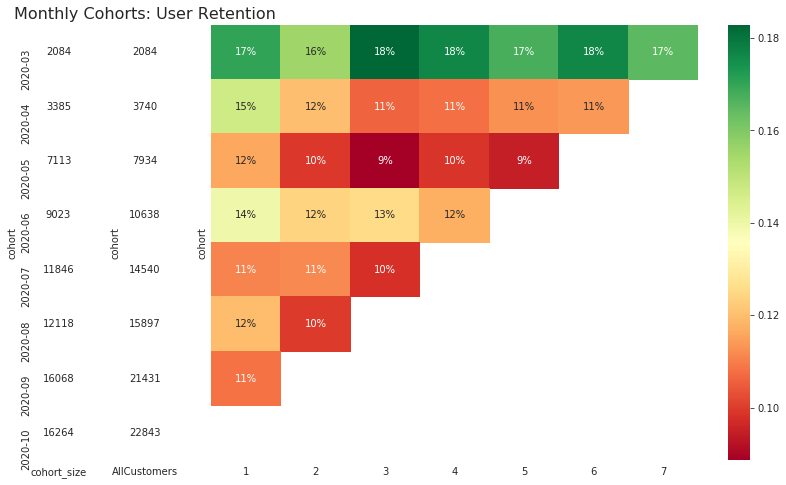

In [2]:
from operator import attrgetter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

df=pd.read_excel(r"C:\Users\oguzhan.guclu\Desktop\Data (37).xlsx",sheet_name="Sheet1",skiprows=2)

RaporGrubu=input("İstenilen müşteri grubunu belirtin (Tümü/Geleneksel/EDT/Bireysel)>>>>")

df.dropna(subset=["MusteriNo"],inplace=True)

df1=df[["Date","MusteriNo","Müşteri Grubu - MüşteriGrup"]].drop_duplicates()
df1['order_month'] = df1['Date'].dt.to_period('M')

#### Tümü Cohort ####
""
if RaporGrubu == "Tümü":

    df1['cohort'] = df1.groupby('MusteriNo')['Date'] \
                     .transform('min') \
                     .dt.to_period('M')
    df_cohort = df1.groupby(['cohort', 'order_month']) \
        .agg(n_customers=('MusteriNo', 'nunique')) \
        .reset_index(drop=False)

    df_cohort['period_number'] = (df_cohort.order_month - df_cohort.cohort).apply(attrgetter('n'))

    cohort_pivot = df_cohort.pivot_table(index='cohort',
                                         columns='period_number',
                                         values='n_customers')

    list = []
    for i in cohort_pivot:
        if i > 0:
            list.append(cohort_pivot[i] / cohort_pivot[0])
    Retention = pd.DataFrame(list).T
    Retention.rename(columns={x: y for x, y in zip(Retention.columns, range(1, len(df.columns) + 10))},inplace=True)

    ##############################################################################################

    with sns.axes_style("white"):
        fig, ax = plt.subplots(1, 3, figsize=(14, 8), sharey=True, gridspec_kw={'width_ratios': [1, 1, 15]})

        # retention matrix
        sns.heatmap(Retention,
                    mask=Retention.isnull(),
                    annot=True,
                    fmt='.0%',
                    cmap='RdYlGn',
                    ax=ax[2])
        ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
        ax[1].set(xlabel='# of periods',
                  ylabel='')

        # cohort size
        cohort_size_df = pd.DataFrame(cohort_pivot.iloc[:, 0]).rename(columns={0: 'cohort_size'})
        white_cmap = mcolors.ListedColormap(['white'])
        sns.heatmap(cohort_size_df,
                    annot=True,
                    cbar=False,
                    fmt='g',
                    cmap=white_cmap,
                    ax=ax[0])
        # AllCustomers
        df_cohort_agg = df1.groupby(['order_month']) \
            .agg(n_customers=('MusteriNo', 'nunique')) \
            .reset_index(drop=False)
        df_cohort_agg.rename(columns={"order_month": "cohort", "n_customers": "AllCustomers"}, inplace=True)
        df_cohort_agg.set_index(df_cohort_agg["cohort"], inplace=True)
        df_cohort_agg.drop(["cohort"], axis=1, inplace=True)
        agg_df = pd.DataFrame(df_cohort_agg.iloc[:, 0])
        sns.heatmap(agg_df,
                    annot=True,
                    cbar=False,
                    fmt="g",
                    cmap=white_cmap,
                    ax=ax[1])
        df_cohort_agg = df1.groupby(['order_month']) \
            .agg(n_customers=('MusteriNo', 'nunique')) \
            .reset_index(drop=False)
        df_cohort_agg.rename(columns={"order_month": "cohort", "n_customers": "AllCustomers"}, inplace=True)
        cohort_pivot = cohort_pivot.merge(df_cohort_agg, on=["cohort"], how="left")
        print(cohort_pivot)
        print(Retention)


#### Geleneksel Cohort ####

elif RaporGrubu=="Geleneksel":
    dfGEL=df1[df1["MüşteriGrup"]=="GELENEKSEL"]
    dfGEL['order_month'] = dfGEL['Date'].dt.to_period('M')

    dfGEL['cohort'] = dfGEL.groupby('MusteriNo')['Date'] \
        .transform('min') \
        .dt.to_period('M')

    df_cohort = dfGEL.groupby(['cohort', 'order_month']) \
        .agg(n_customers=('MusteriNo', 'nunique')) \
        .reset_index(drop=False)

    df_cohort['period_number'] = (df_cohort.order_month - df_cohort.cohort).apply(attrgetter('n'))

    cohort_pivot = df_cohort.pivot_table(index='cohort',
                                         columns='period_number',
                                         values='n_customers')

    list = []
    for i in cohort_pivot:
        if i > 0:
            list.append(cohort_pivot[i] / cohort_pivot[0])
    Retention = pd.DataFrame(list).T
    Retention.rename(columns={x: y for x, y in zip(Retention.columns, range(1, len(df.columns) + 10))},inplace=True)

    ##############################################################################################

    with sns.axes_style("white"):
        fig, ax = plt.subplots(1, 3, figsize=(14, 8), sharey=True, gridspec_kw={'width_ratios': [1, 1, 15]})

        # retention matrix
        sns.heatmap(Retention,
                    mask=Retention.isnull(),
                    annot=True,
                    fmt='.0%',
                    cmap='RdYlGn',
                    ax=ax[2])
        ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
        ax[1].set(xlabel='# of periods',
                  ylabel='')

        # cohort size
        cohort_size_df = pd.DataFrame(cohort_pivot.iloc[:, 0]).rename(columns={0: 'cohort_size'})
        white_cmap = mcolors.ListedColormap(['white'])
        sns.heatmap(cohort_size_df,
                    annot=True,
                    cbar=False,
                    fmt='g',
                    cmap=white_cmap,
                    ax=ax[0])
        # AllCustomers
        df_cohort_agg = dfGEL.groupby(['order_month']) \
            .agg(n_customers=('MusteriNo', 'nunique')) \
            .reset_index(drop=False)
        df_cohort_agg.rename(columns={"order_month": "cohort", "n_customers": "AllCustomers"}, inplace=True)
        df_cohort_agg.set_index(df_cohort_agg["cohort"], inplace=True)
        df_cohort_agg.drop(["cohort"], axis=1, inplace=True)
        agg_df = pd.DataFrame(df_cohort_agg.iloc[:, 0])
        sns.heatmap(agg_df,
                    annot=True,
                    cbar=False,
                    fmt="g",
                    cmap=white_cmap,
                    ax=ax[1])
        df_cohort_agg = df1.groupby(['order_month']) \
            .agg(n_customers=('MusteriNo', 'nunique')) \
            .reset_index(drop=False)
        df_cohort_agg.rename(columns={"order_month": "cohort", "n_customers": "AllCustomers"}, inplace=True)
        cohort_pivot = cohort_pivot.merge(df_cohort_agg, on=["cohort"], how="left")
        print(cohort_pivot)
        print(Retention)

#### EDT Cohort ####

elif RaporGrubu=="EDT":
    dfEDT=df1[df1["MüşteriGrup"]=="EDT"]
    dfEDT['order_month'] = dfEDT['Date'].dt.to_period('M')

    dfEDT['cohort'] = dfEDT.groupby('MusteriNo')['Date'] \
        .transform('min') \
        .dt.to_period('M')

    df_cohort = dfEDT.groupby(['cohort', 'order_month']) \
        .agg(n_customers=('MusteriNo', 'nunique')) \
        .reset_index(drop=False)

    df_cohort['period_number'] = (df_cohort.order_month - df_cohort.cohort).apply(attrgetter('n'))

    cohort_pivot = df_cohort.pivot_table(index='cohort',
                                         columns='period_number',
                                         values='n_customers')

    list = []
    for i in cohort_pivot:
        if i > 0:
            list.append(cohort_pivot[i] / cohort_pivot[0])
    Retention = pd.DataFrame(list).T
    Retention.rename(columns={x: y for x, y in zip(Retention.columns, range(1, len(df.columns) + 10))},inplace=True)

    ##############################################################################################

    with sns.axes_style("white"):
        fig, ax = plt.subplots(1, 3, figsize=(14, 8), sharey=True, gridspec_kw={'width_ratios': [1, 1, 15]})

        # retention matrix
        sns.heatmap(Retention,
                    mask=Retention.isnull(),
                    annot=True,
                    fmt='.0%',
                    cmap='RdYlGn',
                    ax=ax[2])
        ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
        ax[1].set(xlabel='# of periods',
                  ylabel='')

        # cohort size
        cohort_size_df = pd.DataFrame(cohort_pivot.iloc[:, 0]).rename(columns={0: 'cohort_size'})
        white_cmap = mcolors.ListedColormap(['white'])
        sns.heatmap(cohort_size_df,
                    annot=True,
                    cbar=False,
                    fmt='g',
                    cmap=white_cmap,
                    ax=ax[0])
        # AllCustomers
        df_cohort_agg = dfEDT.groupby(['order_month']) \
            .agg(n_customers=('MusteriNo', 'nunique')) \
            .reset_index(drop=False)
        df_cohort_agg.rename(columns={"order_month": "cohort", "n_customers": "AllCustomers"}, inplace=True)
        df_cohort_agg.set_index(df_cohort_agg["cohort"], inplace=True)
        df_cohort_agg.drop(["cohort"], axis=1, inplace=True)
        agg_df = pd.DataFrame(df_cohort_agg.iloc[:, 0])
        sns.heatmap(agg_df,
                    annot=True,
                    cbar=False,
                    fmt="g",
                    cmap=white_cmap,
                    ax=ax[1])
        df_cohort_agg = df1.groupby(['order_month']) \
            .agg(n_customers=('MusteriNo', 'nunique')) \
            .reset_index(drop=False)
        df_cohort_agg.rename(columns={"order_month": "cohort", "n_customers": "AllCustomers"}, inplace=True)
        cohort_pivot = cohort_pivot.merge(df_cohort_agg, on=["cohort"], how="left")
        print(cohort_pivot)
        print(Retention)

#### Bireysel Cohort ####

elif RaporGrubu=="Bireysel":
    dfBIR=df1[df1["MüşteriGrup"]=="BIREYSEL"]
    dfBIR['order_month'] = dfBIR['Date'].dt.to_period('M')

    dfBIR['cohort'] = dfBIR.groupby('MusteriNo')['Date'] \
        .transform('min') \
        .dt.to_period('M')

    df_cohort = dfBIR.groupby(['cohort', 'order_month']) \
        .agg(n_customers=('MusteriNo', 'nunique')) \
        .reset_index(drop=False)

    df_cohort['period_number'] = (df_cohort.order_month - df_cohort.cohort).apply(attrgetter('n'))

    cohort_pivot = df_cohort.pivot_table(index='cohort',
                                         columns='period_number',
                                         values='n_customers')

    list = []
    for i in cohort_pivot:
        if i > 0:
            list.append(cohort_pivot[i] / cohort_pivot[0])
    Retention = pd.DataFrame(list).T
    Retention.rename(columns={x: y for x, y in zip(Retention.columns, range(1, len(df.columns) + 10))},inplace=True)

    ##############################################################################################

    with sns.axes_style("white"):
        fig, ax = plt.subplots(1, 3, figsize=(14, 8), sharey=True, gridspec_kw={'width_ratios': [1, 1, 15]})

        # retention matrix
        sns.heatmap(Retention,
                    mask=Retention.isnull(),
                    annot=True,
                    fmt='.0%',
                    cmap='RdYlGn',
                    ax=ax[2])
        ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
        ax[1].set(xlabel='# of periods',
                  ylabel='')

        # cohort size
        cohort_size_df = pd.DataFrame(cohort_pivot.iloc[:, 0]).rename(columns={0: 'cohort_size'})
        white_cmap = mcolors.ListedColormap(['white'])
        sns.heatmap(cohort_size_df,
                    annot=True,
                    cbar=False,
                    fmt='g',
                    cmap=white_cmap,
                    ax=ax[0])
        # AllCustomers
        df_cohort_agg = dfBIR.groupby(['order_month']) \
            .agg(n_customers=('MusteriNo', 'nunique')) \
            .reset_index(drop=False)
        df_cohort_agg.rename(columns={"order_month": "cohort", "n_customers": "AllCustomers"}, inplace=True)
        df_cohort_agg.set_index(df_cohort_agg["cohort"], inplace=True)
        df_cohort_agg.drop(["cohort"], axis=1, inplace=True)
        agg_df = pd.DataFrame(df_cohort_agg.iloc[:, 0])
        sns.heatmap(agg_df,
                    annot=True,
                    cbar=False,
                    fmt="g",
                    cmap=white_cmap,
                    ax=ax[1])
        df_cohort_agg = df1.groupby(['order_month']) \
            .agg(n_customers=('MusteriNo', 'nunique')) \
            .reset_index(drop=False)
        df_cohort_agg.rename(columns={"order_month": "cohort", "n_customers": "AllCustomers"}, inplace=True)
        cohort_pivot = cohort_pivot.merge(df_cohort_agg, on=["cohort"], how="left")
        print(cohort_pivot)
        print(Retention)

plt.show()


In [18]:
df=pd.read_excel(r"C:\Users\oguzhan.guclu\Desktop\Data (34).xlsx",sheet_name="Sheet1",skiprows=2)

In [19]:
RaporGrubu=input("İstenilen müşteri grubunu belirtin (Tümü/Geleneksel/EDT/Bireysel)>>>>")

df.dropna(subset=["MusteriNo"],inplace=True)

df1=df[["Date","MusteriNo","MüşteriGrup"]].drop_duplicates()

İstenilen müşteri grubunu belirtin (Tümü/Geleneksel/EDT/Bireysel)>>>>Tümü


In [20]:
    df1['order_month'] = df1['Date'].dt.to_period('M')

    df1['cohort'] = df1.groupby('MusteriNo')['Date'] \
                     .transform('min') \
                     .dt.to_period('M')

    df_cohort = df1.groupby(['cohort', 'order_month']) \
                  .agg(n_customers=('MusteriNo', 'nunique')) \
                  .reset_index(drop=False)

    df_cohort['period_number'] = (df_cohort.order_month - df_cohort.cohort).apply(attrgetter('n'))


In [22]:

    cohort_pivot = df_cohort.pivot_table(index='cohort',
                                         columns='period_number',
                                         values='n_customers')


In [56]:
df_cohort_agg = df1.groupby(['order_month']) \
                .agg(n_customers=('MusteriNo', 'nunique')) \
                .reset_index(drop=False)
df_cohort_agg.rename(columns={"order_month":"cohort","n_customers":"AllCustomers"},inplace=True)

In [58]:
cohort_pivot=cohort_pivot.merge(df_cohort_agg,on=["cohort"],how="left")

In [59]:
cohort_pivot.AllCustomers

,cohort,0,1,2,3,4,5,6,7,8,9,AllCustomers
0,2020-01,1943.0,546.0,500.0,258.0,279.0,364.0,356.0,357.0,370.0,303.0,1943
1,2020-02,1448.0,249.0,124.0,113.0,165.0,145.0,152.0,173.0,144.0,NaN,1994
2,2020-03,1968.0,200.0,153.0,168.0,173.0,173.0,172.0,139.0,NaN,NaN,2717
3,2020-04,3158.0,420.0,327.0,284.0,287.0,309.0,235.0,NaN,NaN,NaN,3740
4,2020-05,6969.0,782.0,668.0,593.0,660.0,497.0,NaN,NaN,NaN,NaN,7934
5,2020-06,8832.0,1195.0,1053.0,1061.0,791.0,NaN,NaN,NaN,NaN,NaN,10638
6,2020-07,11719.0,1280.0,1284.0,909.0,NaN,NaN,NaN,NaN,NaN,NaN,14540
7,2020-08,12002.0,1421.0,932.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15897
8,2020-09,15981.0,1398.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21431
9,2020-10,11780.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17128


In [62]:
cohort_pivot.columns.Index(['cohort','AllCustomers', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

AttributeError: 'Index' object has no attribute 'Index'

In [ ]:

    list=[]
    for i in cohort_pivot:
        if i>0:
            list.append(cohort_pivot[i]/cohort_pivot[0])
    Retention=pd.DataFrame(list).T
    print(cohort_pivot)
    print(Retention)

    ##############################################################################################

    with sns.axes_style("white"):
        fig, ax=plt.subplots(1,2,figsize=(12,8), sharey= True, gridspec_kw={'width_ratios': [1, 11]})

        # retention matrix
        sns.heatmap(Retention,
                    mask=Retention.isnull(),
                    annot=True,
                    fmt='.0%',
                    cmap='RdYlGn',
                    ax=ax[1])
        ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
        ax[1].set(xlabel='# of periods',
                  ylabel='')

        # cohort size
        cohort_size_df = pd.DataFrame(cohort_pivot.iloc[:, 0]).rename(columns={0: 'cohort_size'})
        white_cmap = mcolors.ListedColormap(['white'])
        sns.heatmap(cohort_size_df,
                    annot=True,
                    cbar=False,
                    fmt='g',
                    cmap=white_cmap,
                    ax=ax[0])

        fig.tight_layout()
        plt.show()

In [5]:
from operator import attrgetter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

df=pd.read_excel(r"C:\Users\oguzhan.guclu\Desktop\Data (37).xlsx",sheet_name="Sheet1",skiprows=2)

RaporGrubu=input("İstenilen müşteri grubunu belirtin (Tümü/Geleneksel/EDT/Bireysel)>>>>")

df.dropna(subset=["MusteriNo"],inplace=True)

df1=df[["Date","MusteriNo","Müşteri Grubu - MüşteriGrup"]].drop_duplicates()
df1['order_month'] = df1['Date'].dt.to_period('M')

#### Tümü Cohort ####
""
df1['cohort'] = df1.groupby('MusteriNo')['Date'] \
                 .transform('min') \
                 .dt.to_period('M')
df_cohort = df1.groupby(['cohort', 'order_month']) \
    .agg(n_customers=('MusteriNo', 'nunique')) \
    .reset_index(drop=False)

df_cohort['period_number'] = (df_cohort.order_month - df_cohort.cohort).apply(attrgetter('n'))

İstenilen müşteri grubunu belirtin (Tümü/Geleneksel/EDT/Bireysel)>>>>Tümü


In [10]:
df1[df1["MusteriNo"]=="M423292"]

,Date,MusteriNo,Müşteri Grubu - MüşteriGrup,order_month,cohort
17728,2020-09-14,M423292,GELENEKSEL,2020-09,2020-01
32598,2020-08-29,M423292,GELENEKSEL,2020-08,2020-01
51073,2020-08-05,M423292,GELENEKSEL,2020-08,2020-01
62909,2020-07-17,M423292,GELENEKSEL,2020-07,2020-01
71143,2020-07-04,M423292,GELENEKSEL,2020-07,2020-01
75745,2020-06-26,M423292,GELENEKSEL,2020-06,2020-01
82666,2020-06-13,M423292,GELENEKSEL,2020-06,2020-01
88635,2020-05-29,M423292,GELENEKSEL,2020-05,2020-01
94690,2020-05-12,M423292,GELENEKSEL,2020-05,2020-01
96800,2020-05-05,M423292,GELENEKSEL,2020-05,2020-01


In [8]:
df1

,Date,MusteriNo,Müşteri Grubu - MüşteriGrup,order_month,cohort
10,2020-09-30,M000465,BIREYSEL,2020-09,2020-09
11,2020-09-30,M0004YK,BIREYSEL,2020-09,2020-09
12,2020-09-30,M001294,GELENEKSEL,2020-09,2020-09
15,2020-09-30,M0013CF,BIREYSEL,2020-09,2020-09
17,2020-09-30,M0015RQ,EDT,2020-09,2020-09
...,...,...,...,...,...
143899,2020-02-29,M08445Z,GELENEKSEL,2020-02,2020-01
143900,2020-02-29,M31754J,GELENEKSEL,2020-02,2020-01
143902,2020-02-29,M423292,GELENEKSEL,2020-02,2020-01
143903,2020-02-29,M755665,GELENEKSEL,2020-02,2020-01
